# Bonus

🎯 You are free to play around with the full `ML_Houses_dataset.csv` [available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv), made up of 84 features!

- Investigate the features
- Preprocess and encode them accordingly
- Brainstorm feature engineering
- Add them to your modeling
- Perform feature selection

👇 Save the file locally in the `data` folder and import here.

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

df = pd.read_csv('data/ML_Houses_dataset.csv')

In [13]:
((df.isnull().sum().sort_values(ascending=False)/len(df))*100).head(20)

WallMat         99.715909
PoolQC          99.488636
MiscFeature     96.250000
Alley           93.636364
Fence           80.568182
FireplaceQu     46.988636
LotFrontage     17.556818
GarageType       5.284091
GarageFinish     5.284091
GarageQual       5.284091
GarageCond       5.284091
GarageYrBlt      5.284091
BsmtFinType2     2.556818
BsmtExposure     2.500000
BsmtQual         2.443182
BsmtFinType1     2.443182
BsmtCond         2.443182
Pesos            0.738636
RoofSurface      0.568182
MasVnrArea       0.511364
dtype: float64

ℹ️ Make sure you refer to the description of the dataset [available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [20]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df.duplicated().sum()
df = df.drop_duplicates()

In [27]:
df.shape

(1460, 78)

In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Pesos', 'RoofSurface', 'ChimneyStyle', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

In [30]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(df[['LotArea', 'YearBuilt', 'YearRemodAdd', 'RoofSurface', 'GrLivArea' , 'GarageArea', 'PoolArea' ]])

df[['LotArea', 'YearBuilt', 'YearRemodAdd', 'RoofSurface', 'GrLivArea' , 'GarageArea', 'PoolArea' ]] = r_scaler.transform(df[['LotArea', 'YearBuilt', 'YearRemodAdd', 'RoofSurface', 'GrLivArea' , 'GarageArea', 'PoolArea' ]])

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [33]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.254076,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0.0,0,2,2008,WD,Normal,208500
1,2,20,RL,0.030015,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0.0,0,5,2007,WD,Normal,181500
2,3,60,RL,0.437624,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0.0,0,9,2008,WD,Normal,223500
3,4,70,RL,0.017663,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0.0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,1.181201,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0.0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,-0.385746,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0.0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,0.913167,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0.0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,-0.107831,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0.0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,0.058918,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0.0,0,4,2010,WD,Normal,142125


In [63]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

ohe.fit(df[['MSZoning']])

df['MSZoning']= ohe.transform(df[['MSZoning']]) 

ohe.fit(df[['Street']])
df['Street'] = ohe.transform(df[['Street']])

ohe.fit(df[['LotShape']])
df['LotShape'] = ohe.transform(df[['LotShape']])

ohe.fit(df[['LandContour']])
df['LandContour'] = ohe.transform(df[['LandContour']])

ohe.fit(df[['Utilities']])
df['Utilities'] = ohe.transform(df[['Utilities']])

ohe.fit(df[['LotConfig']])
df['LotConfig'] = ohe.transform(df[['LotConfig']])

ohe.fit(df[['LandSlope']])
df['LandSlope'] = ohe.transform(df[['LandSlope']])


ohe.fit(df[['SaleCondition']])
df['SaleCondition'] = ohe.transform(df[['SaleCondition']])
 
ohe.fit(df[['SaleType']])
df['SaleType'] = ohe.transform(df[['SaleType']])

/tmp/ipykernel_12275/226724339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSZoning']= ohe.transform(df[['MSZoning']])
/tmp/ipykernel_12275/226724339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Street'] = ohe.transform(df[['Street']])
/tmp/ipykernel_12275/226724339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

<AxesSubplot:>

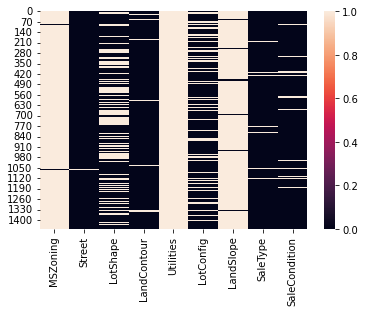

In [76]:
sns.heatmap(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'SaleType','SaleCondition']])

In [67]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Pesos', 'RoofSurface', 'ChimneyStyle', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

In [88]:
corr = df.corr()
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()



,feature_1,feature_2,correlation
1631,GarageArea,GarageCars,0.882475
1585,GarageCars,GarageArea,0.882475
1516,GarageYrBlt,YearBuilt,0.825667
596,YearBuilt,GarageYrBlt,0.825667
1433,TotRmsAbvGrd,GrLivArea,0.824639


In [89]:
corr = df.corr()
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
1631,GarageArea,GarageCars,0.882475
1585,GarageCars,GarageArea,0.882475
1516,GarageYrBlt,YearBuilt,0.825667
596,YearBuilt,GarageYrBlt,0.825667
1433,TotRmsAbvGrd,GrLivArea,0.824639


In [90]:
df.drop(columns = 'GarageCars', inplace=True)

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
df.drop(columns = 'GarageYrBlt', inplace=True)
df.drop(columns = 'TotRmsAbvGrd', inplace=True)

KeyError: "['GarageYrBlt'] not found in axis"

In [97]:
df.corr()
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
1631,GarageArea,GarageCars,0.882475
1585,GarageCars,GarageArea,0.882475
1516,GarageYrBlt,YearBuilt,0.825667
596,YearBuilt,GarageYrBlt,0.825667
1433,TotRmsAbvGrd,GrLivArea,0.824639
